In [1]:
state = 'WV' 
year = 2010
objective_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']
starting_deviation = 0.01 

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of WV has 3 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))
from WV_plans_2010 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 1575 plans from file.


In [6]:
from epsilon_constraint import epsilon_constraint_method
from pareto import filter_and_sort_pareto
from metrics import scores

plans_dict = {}
for obj_type in objective_types:
    
    print(f"\n{'#' * 100}")
    print(f"Applying epsilon-constraint method for {state} with compactness objective {obj_type}")
    print(f"{'#' * 100}\n")
    
    plans_scores = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]
    _,_,nondominated_warm_starts_plans = filter_and_sort_pareto(plans=warm_starts, upper_bounds=plans_scores, obj_type=obj_type)
    print(f"Passing {len(nondominated_warm_starts_plans)} nondominated warm start plans")
    
    (new_plans, obj_bounds, deviations) = epsilon_constraint_method(
                G,                 
                obj_type,          
                contiguity ='lcut',                                             # {'lcut', 'scf', 'shir'} 
                cutoff=None,       
                verbose=True,
                warm_start_mode ='user',                                        # {'None', 'user', 'refinement'}
                warm_starts=nondominated_warm_starts_plans,                     # if you have user define warm starts else it is None
                starting_deviation=starting_deviation, 
                time_limit=7200, 
                sizes=None,      
                max_B=True,                                                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True   
                symmetry_breaking='orbitope',                                    # {None, 'orbitope', 'rsum'} 
                state=state,
                year=year
            )
    plans_dict[(state, obj_type)] = list(zip(new_plans, obj_bounds, deviations))
    warm_starts += new_plans


####################################################################################################
Applying epsilon-constraint method for WV with compactness objective cut_edges
####################################################################################################

Passing 12 nondominated warm start plans
Initially, L = 611489 and U = 623841 and k = 3.

****************************************
Trying deviation = 6176.6466666666665
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 8, 15, 18, 25, 28, 38, 40, 41, 43, 44, 50, 53], [2, 4, 6, 7, 11, 12, 14, 16, 17, 19, 20, 29, 30, 31, 32, 33, 34, 36, 42, 46, 48, 49, 51, 54], [0, 3, 5, 9, 10, 13, 21, 22, 23, 24, 26, 27, 35, 37, 39, 45, 47, 52]]
Objective value: 23
Deviation: 3014.666666666628

****************************************
Running labeling model!
****************************************
L = 611489 and U = 623841 and k = 3
Set parameter Username
Set parameter Licens

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 30
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  30
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 2168 rows, 1825 columns and 7001 nonzeros
Model fingerprint: 0x69440da9
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]

User MIP start produced solution with objective 25 (0.02s)
Loaded user MIP start with objective 25

Presolv

Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  30
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 2168 rows, 1825 columns and 7001 nonzeros
Model fingerprint: 0x75ee318c
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]

User MIP start produced solution with objective 27 (0.02s)
Loaded user MIP start with objective 27

Presolve removed 1133 rows and 833 columns
Presolve time: 0.02s
Presolved: 1035 rows, 992 columns, 3530 nonzeros
Variable types: 0 continuous, 992 integer (989 binary)

Root relaxation: objective 8.265345e+00, 889 iterations, 0.02 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap |

Model fingerprint: 0xe371d45b
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]

User MIP start produced solution with objective 29 (0.01s)
Loaded user MIP start with objective 29

Presolve removed 1088 rows and 831 columns
Presolve time: 0.01s
Presolved: 1080 rows, 994 columns, 3623 nonzeros
Variable types: 0 continuous, 994 integer (988 binary)

Root relaxation: objective 8.273444e+00, 800 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.27344    0  183   29.00000    8.27344  71.5%     -    0s
     0     0    8.95549    0  193   29.00000    8.95549  69.1%     -    0s
     0     0    9.39248    0  200   29.00000    9.39248  67.6%     -    0s
     0     0    

Set parameter LazyConstraints to value 1
Applying warm start!
Set parameter FeasibilityTol to value 1e-07
Set parameter IntFeasTol to value 1e-07
Set parameter MIPGap to value 1e-07
Set parameter TimeLimit to value 60
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Non-default parameters:
TimeLimit  60
FeasibilityTol  1e-07
IntFeasTol  1e-07
MIPGap  1e-07
LazyConstraints  1

Optimize a model with 2168 rows, 1825 columns and 7001 nonzeros
Model fingerprint: 0x6f42219c
Variable types: 495 continuous, 1330 integer (1330 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+05]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+05]

User MIP start produced solution with objective 31 (0.01s)
Loaded user MIP start with objective 31

Presolv

 217527 59757   26.80387   40  111   32.00000   25.64356  19.9%  31.6   45s
 245152 63973 infeasible   46        32.00000   25.86819  19.2%  31.5   50s
 274819 69112   29.81658   31   61   32.00000   26.04919  18.6%  31.4   55s
 299219 72340   27.18767   32   84   32.00000   26.19248  18.1%  31.3   60s

Cutting planes:
  Gomory: 4
  Inf proof: 1
  Zero half: 9
  RLT: 1
  Lazy constraints: 42

Explored 300305 nodes (9390173 simplex iterations) in 60.06 seconds (33.47 work units)
Thread count was 20 (of 20 available processors)

Solution count 1: 32 

Time limit reached
Best objective 3.200000000000e+01, best bound 2.700000000000e+01, gap 15.6250%

User-callback calls 605153, time in user-callback 1.98 sec
Time limit reached! Best feasible solution found:

****************************************
No optimal solution found! Gurobi status: 9
****************************************
Time limit 60 reached. Subsequent deviations will use quick time limit 60.
plan = [[12, 18, 25, 28, 31, 36, 3

 13934  9322   32.23228   57   38   41.00000   20.69452  49.5%  36.3    5s
 47762 31582   27.06711   29   96   41.00000   22.43807  45.3%  31.9   10s
 77961 49473   33.69412   49   61   41.00000   23.07286  43.7%  31.2   15s
 109820 69584   31.38071   54   53   41.00000   23.40015  42.9%  31.3   20s
 147882 92111   26.00000   31   53   41.00000   23.70329  42.2%  29.9   25s
 184106 113667   32.67692   34  137   41.00000   23.95491  41.6%  29.6   30s
 221722 135078   33.76085   38   73   41.00000   24.11112  41.2%  29.3   35s
 260423 156939 infeasible   61        41.00000   24.27291  40.8%  29.0   40s
 301145 179560   35.33112   50   71   41.00000   24.40966  40.5%  28.8   45s
 341119 201754   35.24785   46  116   41.00000   24.53012  40.2%  28.6   50s
 379162 221830   27.92051   50  103   41.00000   24.64147  39.9%  28.5   55s
 415908 241326   28.43760   48   37   41.00000   24.74459  39.6%  28.4   60s

Cutting planes:
  Gomory: 4

Explored 416157 nodes (11833917 simplex iterations) in

Variable types: 0 continuous, 992 integer (989 binary)

Root relaxation: objective 8.277801e+00, 908 iterations, 0.02 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.27780    0  184          -    8.27780      -     -    0s
     0     0    9.10389    0  194          -    9.10389      -     -    0s
     0     0    9.52710    0  209          -    9.52710      -     -    0s
     0     0    9.53926    0  212          -    9.53926      -     -    0s
     0     0    9.56480    0  212          -    9.56480      -     -    0s
     0     0    9.56480    0  214          -    9.56480      -     -    0s
     0     0    9.59347    0  212          -    9.59347      -     -    0s
     0     0    9.60361    0  211          -    9.60361      -     -    0s
     0     2    9.64693    0  211          -    9.64693      -     -    0s
  9424  6353   22.48143   22 

Final county-level districts for Enacted Plan is:
[[6, 14, 21, 22, 23, 27, 28, 29, 30, 37, 39, 41, 44, 47, 50, 51, 52], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54], [0, 2, 3, 4, 5, 10, 11, 13, 16, 17, 20, 24, 26, 31, 32, 33, 35, 45, 48, 49]]
Deviation for 'Enacted Plan': 3197.333333333372
Objective values for 'Enacted Plan': {'cut_edges': 34}


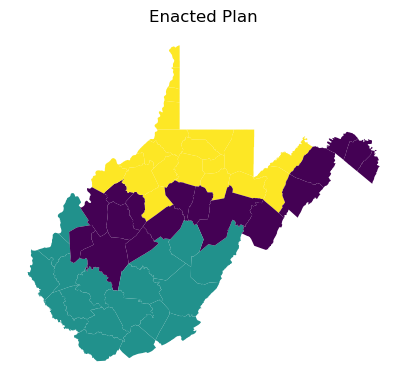

Final county-level districts for Facemire Plan is:
[[2, 4, 6, 11, 14, 16, 17, 20, 28, 29, 30, 31, 32, 41, 44, 48, 49, 50, 51], [1, 7, 8, 9, 12, 15, 18, 19, 25, 34, 36, 38, 40, 42, 43, 46, 53, 54], [0, 3, 5, 10, 13, 21, 22, 23, 24, 26, 27, 33, 35, 37, 39, 45, 47, 52]]
Deviation for 'Facemire Plan': 1523.6666666666279
Objective values for 'Facemire Plan': {'cut_edges': 27}


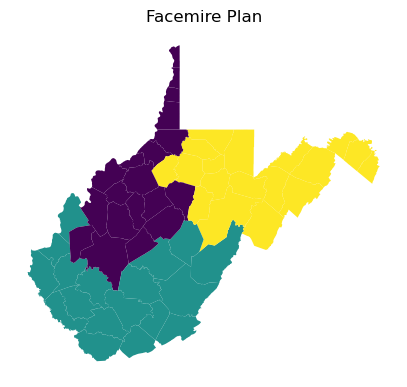

Final county-level districts for Cooper Plan 1 is:
[[0, 2, 4, 6, 11, 14, 16, 17, 18, 20, 25, 29, 30, 31, 32, 38, 41, 48, 49, 50], [3, 5, 7, 9, 10, 13, 21, 22, 23, 24, 26, 27, 33, 35, 37, 39, 42, 45, 46, 47, 51, 52, 54], [1, 8, 12, 15, 19, 28, 34, 36, 40, 43, 44, 53]]
Deviation for 'Cooper Plan 1': 323.66666666662786
Objective values for 'Cooper Plan 1': {'cut_edges': 34}


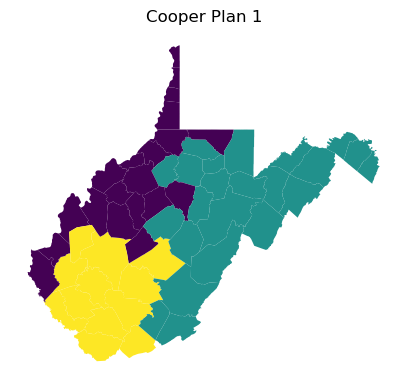

Final county-level districts for Cooper Plan 2 is:
[[5, 6, 7, 9, 10, 14, 18, 20, 25, 29, 30, 31, 35, 38, 41, 42, 46, 48, 50, 51, 52, 54], [1, 8, 12, 15, 19, 28, 34, 36, 40, 43, 44, 53], [0, 2, 3, 4, 11, 13, 16, 17, 21, 22, 23, 24, 26, 27, 32, 33, 37, 39, 45, 47, 49]]
Deviation for 'Cooper Plan 2': 232.66666666662786
Objective values for 'Cooper Plan 2': {'cut_edges': 36}


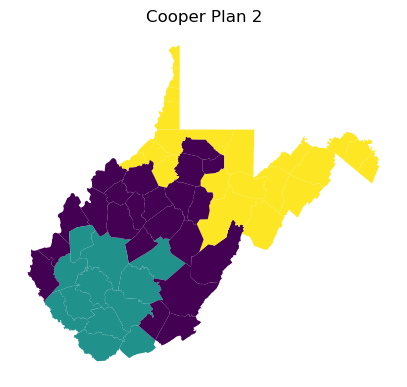

Final county-level districts for Cooper Plan 3 is:
[[5, 7, 9, 10, 12, 15, 19, 20, 29, 30, 34, 35, 36, 40, 42, 43, 46, 51, 52, 53, 54], [1, 6, 8, 14, 18, 25, 28, 31, 38, 41, 44, 48, 50], [0, 2, 3, 4, 11, 13, 16, 17, 21, 22, 23, 24, 26, 27, 32, 33, 37, 39, 45, 47, 49]]
Deviation for 'Cooper Plan 3': 115.66666666662786
Objective values for 'Cooper Plan 3': {'cut_edges': 35}


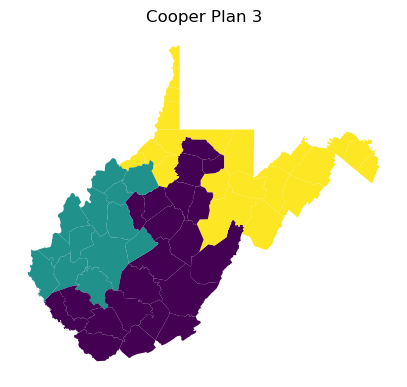

In [7]:
# Special plans
from metrics import county_level_districts, compute_obj, observed_deviation_persons
from draw import draw_plan
import math

special_plans = ['Enacted Plan','Facemire Plan','Cooper Plan 1','Cooper Plan 2','Cooper Plan 3']
special_plans_scores = {}
G_copy = G.copy()
G_copy._k = G._k
G_copy._ideal_population = G._ideal_population

for plan_name in special_plans:
            
    districts = county_level_districts(G_copy, plan_name, G_copy._k)
    print(f"Final county-level districts for {plan_name} is:")
    print(districts)
    
    deviation = observed_deviation_persons(G_copy, districts, G_copy._ideal_population)
    G_copy._L = math.ceil(G_copy._ideal_population - deviation)
    G_copy._U = math.floor(G_copy._ideal_population + deviation)
    
    scores = {obj: round(compute_obj(G_copy, districts, obj), 4) for obj in objective_types}
    special_plans_scores[plan_name] = [deviation, scores]
    
    print(f"Deviation for '{plan_name}': {deviation}")
    print(f"Objective values for '{plan_name}': {scores}")

    draw_plan(filepath, filename2, G_copy, districts, title=plan_name, year=year)

No feasible solution was found within the region: [0, 2.3]

####################################################################################################
Pareto Frontier for state WV,  objective cut_edges
####################################################################################################

Pareto front plans: [[[3, 6, 8, 14, 18, 20, 24, 25, 28, 29, 30, 34, 38, 40, 48, 50, 52], [0, 2, 4, 5, 10, 11, 16, 17, 31, 32, 33, 35, 41, 44, 45, 49], [1, 7, 9, 12, 13, 15, 19, 21, 22, 23, 26, 27, 36, 37, 39, 42, 43, 46, 47, 51, 53, 54]], [[1, 6, 7, 9, 12, 14, 21, 28, 30, 34, 36, 37, 42, 43, 44, 46, 47, 50, 54], [2, 4, 8, 11, 15, 16, 17, 18, 19, 25, 31, 32, 38, 40, 41, 49, 53], [0, 3, 5, 10, 13, 20, 22, 23, 24, 26, 27, 29, 33, 35, 39, 45, 48, 51, 52]], [[2, 4, 6, 11, 12, 14, 16, 17, 28, 30, 31, 32, 34, 41, 49, 50], [0, 3, 5, 10, 13, 20, 22, 23, 24, 26, 27, 29, 33, 35, 39, 45, 48, 51, 52], [1, 7, 8, 9, 15, 18, 19, 21, 25, 36, 37, 38, 40, 42, 43, 44, 46, 47, 53, 54]], [[12, 18, 2

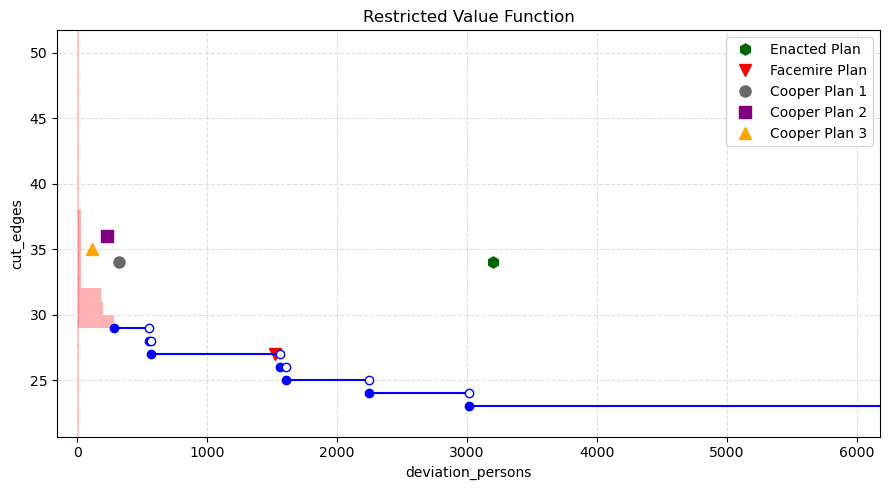

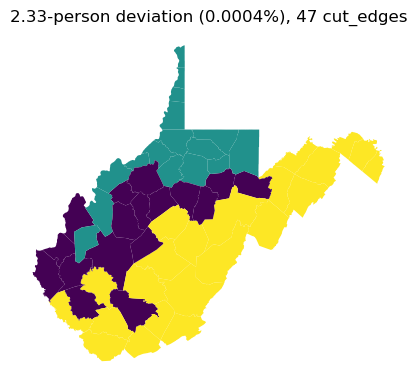

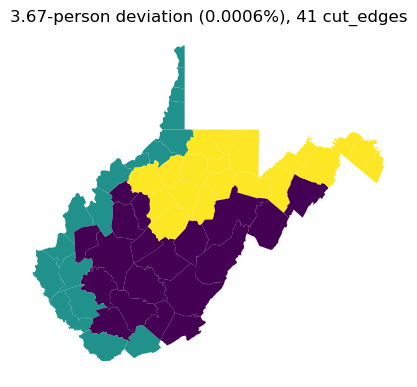

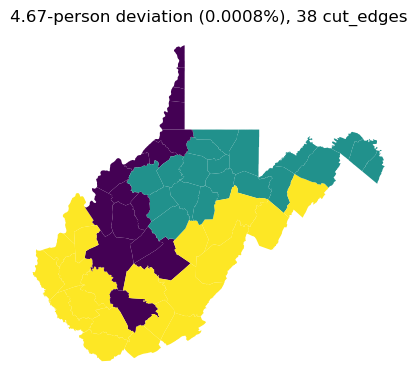

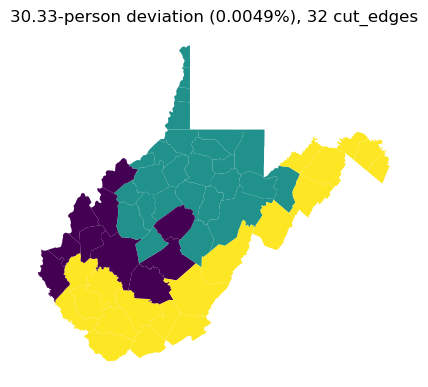

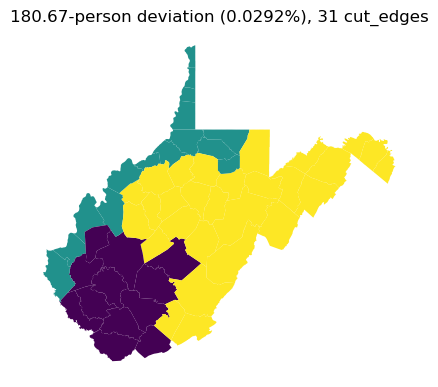

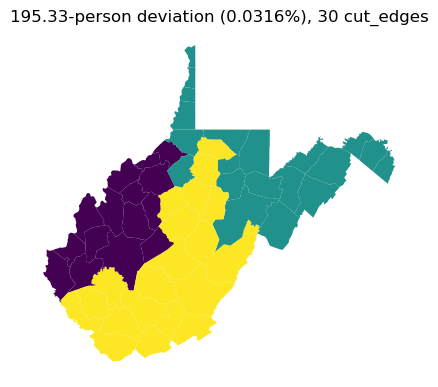

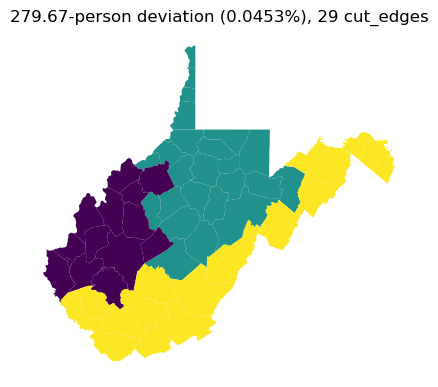

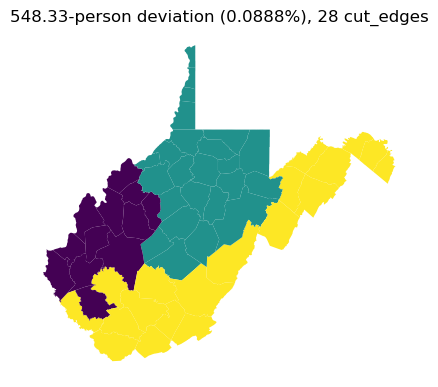

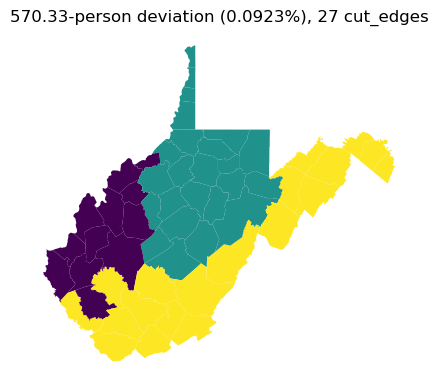

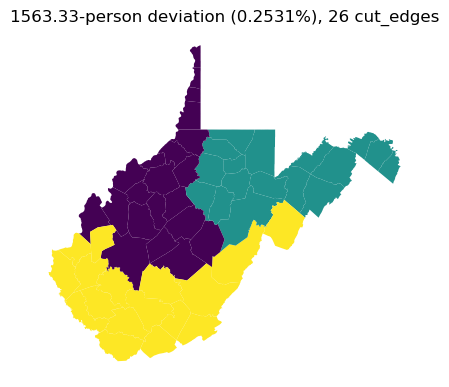

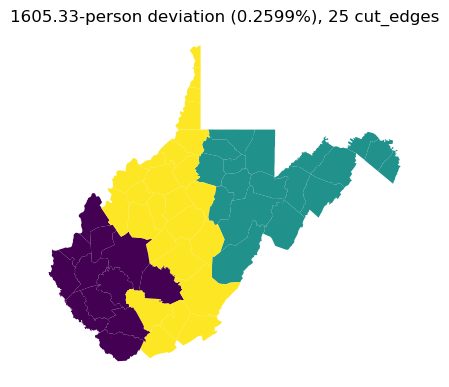

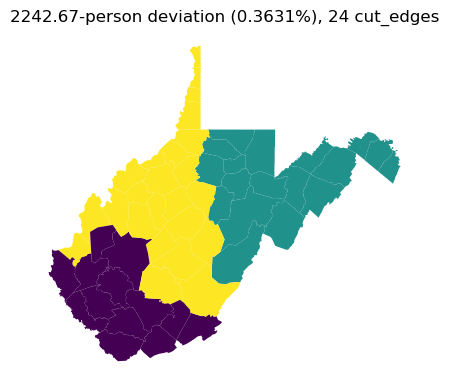

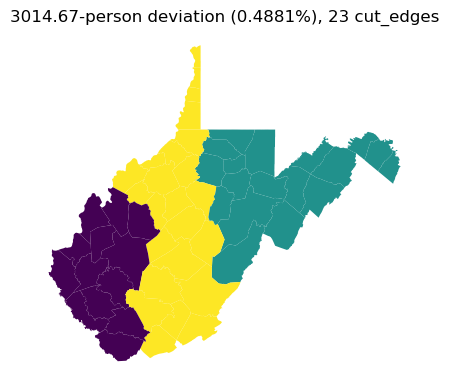

In [8]:
from pareto import plot_pareto_frontiers

epsilon = 1 / (2 * G._k)
for (state, obj_type), result in plans_dict.items():
    
    min_deviation = min(round(r[2], 1) for r in result)
    if min_deviation < epsilon:
        no_solution_region = None
    else:
        no_solution_region = [0, min_deviation]
        print(f"No feasible solution was found within the region: {no_solution_region}")
        
    plot_pareto_frontiers(
                    G,
                    method='epsilon_constraint_method',
                    plans=None,                                   #if method ='epsilon_constraint_method' is None 
                    obj_types=obj_type,                               
                    ideal_population=G._ideal_population,
                    state=state,
                    filepath=filepath,
                    filename2=filename2,
                    no_solution_region=no_solution_region,
                    year=year,
                    result=result,                               #if method ='heuristic' is None 
                    special_plans_scores=special_plans_scores
                 )